In [2]:
print("Project name is: JanataHack NLP Hackathon")

Project name is: JanataHack NLP Hackathon


In [ ]:
# A brief of problem statement

In [ ]:
'''
Sentiment Analysis for Steam Reviews
Steam is a video game digital distribution service with a vast community of gamers globally. A lot of gamers write reviews at 
the game page and have an option of choosing whether they would recommend this game to others or not. However, determining this
sentiment automatically from text can help Steam to automatically tag such reviews extracted from other forums across the 
internet and can help them better judge the popularity of games.

Given the review text with user recommendation and other information related to each game for 64 game titles, the task is to 
predict whether the reviewer recommended the game titles available in the test set on the basis of review text and other 
information.

Game overview information for both train and test are available in single file game_overview.csv inside train.zip

'''

In [ ]:
# Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
from nltk.stem import WordNetLemmatizer
import re
from textblob import TextBlob
from nltk.corpus import stopwords

In [ ]:
# Loading dataset

In [46]:
train1=pd.read_csv("C://Users//acer//Desktop//1sem//python//JanatahackNLP//train.csv")

In [ ]:
# A few rows fro top

In [3]:
train1.head(3)

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1


In [ ]:
# A few rows from bottom

In [4]:
train1.tail(3)

,review_id,title,year,user_review,user_suggestion
17491,25537,EverQuest II,2011.0,When I frist started playing Everquest 2 it wa...,1
17492,25538,EverQuest II,NaN,cool game. THe only thing that REALLY PISSES M...,1
17493,25539,EverQuest II,NaN,"this game since I was a little kid, always hav...",1


In [ ]:
# some rows taken randomly

In [5]:
train1.sample(3)

,review_id,title,year,user_review,user_suggestion
14193,20137,Infestation: The New Z,2017.0,"PLADED 7 MINUTES GOT NIGHT VISION GOGG;ES, GOL...",0
9492,13076,Realm of the Mad God,2017.0,i liked everything:):):):):):):):):):):):):):)...,1
9704,13288,Elsword,2014.0,"Greatest free game on the market, except when ...",1


In [ ]:
# shape

In [6]:
train1.shape

(17494, 5)

In [ ]:
# Loading second part of training dataset

In [47]:
train2=pd.read_csv("C://Users//acer//Desktop//1sem//python//JanatahackNLP//game.csv")

In [ ]:
# A few rows from top

In [8]:
train2.head(3)

,title,developer,publisher,tags,overview
0,Spooky's Jump Scare Mansion,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
1,Sakura Clicker,Winged Cloud,Winged Cloud,"['Nudity', 'Anime', 'Free to Play', 'Mature', ...",The latest entry in the Sakura series is more ...
2,WARMODE,WARTEAM,WARTEAM,"['Early Access', 'Free to Play', 'FPS', 'Multi...",Free to play shooter about the confrontation o...


In [ ]:
# a few rows from bottom

In [9]:
train2.tail(3)

,title,developer,publisher,tags,overview
61,GUNS UP!,"Valkyrie Entertainment, LLC","PlayStation Mobile, Inc.","['Free to Play', 'Strategy', 'Multiplayer', 'A...","In a mashup of RTS & Tower Defense, GUNS UP! i..."
62,School of Dragons,"JumpStart Games, Inc.","JumpStart Games, Inc.","['Free to Play', 'Dragons', 'Adventure', 'Mult...",**Changewing Dragon now Available**Fly Fast. T...
63,EverQuest II,Daybreak Game Company,Daybreak Game Company,"['Free to Play', 'Massively Multiplayer', 'RPG...",EverQuest® II is the epitome of massively mult...


In [ ]:
# random rows

In [10]:
train2.sample(3)

,title,developer,publisher,tags,overview
41,Digimon Masters Online,"Move Games Co., Ltd.",MOVE ON USA CO.,"['Free to Play', 'Anime', 'Adventure', 'Massiv...",Digimon Masters Online is the latest MMO featu...
25,PlanetSide 2,Daybreak Game Company,Daybreak Game Company,"['Free to Play', 'Massively Multiplayer', 'FPS...","PlanetSide 2 is a free-to-play, massively mult..."
13,Paladins®,Evil Mojo Games,Hi-Rez Studios,"['Free to Play', 'Multiplayer', 'FPS', 'Shoote...","Join 25+ million players in Paladins, the free..."


In [ ]:
# shape of dataset

In [11]:
train2.shape

(64, 5)

In [ ]:
# Lets merge these two dataset

In [48]:
df=pd.merge(train1,train2,on="title")

In [ ]:
# Now lets check the final dataset

In [49]:
df.sample(5)

,review_id,title,year,user_review,user_suggestion,developer,publisher,tags,overview
10930,16427,Eternal Card Game,2017.0,Early Access ReviewThe game is very fun at fir...,0,Dire Wolf Digital,Dire Wolf Digital,"['Free to Play', 'Card Game', 'Strategy', 'Tra...",The Game Has ChangedSix-guns and sorcery colli...
10119,15527,theHunter Classic,2016.0,"The full story: I get the game, I get a gun, I...",0,"Expansive Worlds, Avalanche Studios","Expansive Worlds, Avalanche Studios","['Free to Play', 'Hunting', 'Multiplayer', 'Op...",The most realistic online hunting game ever cr...
13699,19643,Creativerse,2017.0,"I have had this game for about 2 years now, it...",1,Playful Corp.,Playful Corp.,"['Free to Play', 'Survival', 'Open World', 'Mu...",EMBARK ON A WONDROUS ADVENTUREWield the power ...
8030,11040,Neverwinter,2015.0,Really fun the first time through...buuuuuuut ...,0,Cryptic Studios,Perfect World Entertainment,"['Free to Play', 'MMORPG', 'RPG', 'Massively M...",
11116,16613,Eternal Card Game,2018.0,"Gameplay is broken,and its quite sad, it didn...",0,Dire Wolf Digital,Dire Wolf Digital,"['Free to Play', 'Card Game', 'Strategy', 'Tra...",The Game Has ChangedSix-guns and sorcery colli...


In [ ]:
# Listing all column names

In [18]:
df.columns

Index(['review_id', 'title', 'year', 'user_review', 'user_suggestion',
       'developer', 'publisher', 'tags', 'overview'],
      dtype='object')

In [ ]:
# Detailed summary 

In [19]:
pd.DataFrame({"TotalMissing":df.isna().sum(),"%Missing":df.isna().mean(),"DataType":df.dtypes,"Unique":df.nunique()})

,TotalMissing,%Missing,DataType,Unique
review_id,0,0.000000,int64,17494
title,0,0.000000,object,44
year,178,0.010175,float64,8
user_review,0,0.000000,object,17490
user_suggestion,0,0.000000,int64,2
developer,0,0.000000,object,42
publisher,0,0.000000,object,40
tags,0,0.000000,object,44
overview,0,0.000000,object,43


In [ ]:
# EDA

In [ ]:
# as we have missing data in col year we will impute some values in place of null

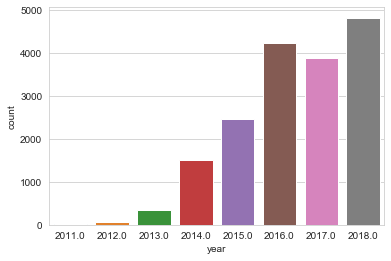

In [7]:
sns.countplot(df["year"])

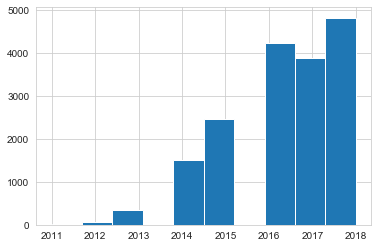

In [11]:
df["year"].hist()

In [50]:
df.year.fillna(df.year.median(),inplace=True)

In [ ]:
# Lets see the target col distribution

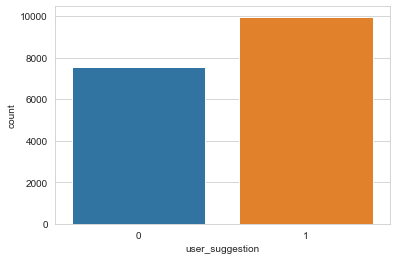

In [40]:
sns.countplot(df.user_suggestion)

In [42]:
df.user_suggestion.value_counts(normalize=True)

1    0.569795
0    0.430205
Name: user_suggestion, dtype: float64

In [ ]:
# Lets process the reviews given by users: starting by converting the type to str

In [51]:
df["user_review"]=df.user_review.astype(str)

In [52]:
def clean_data(data,column_name):
    documents = []
    document1 = ''

    stemmer = WordNetLemmatizer()

    for sen in range(0, len(data)):  
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(data[sen]))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)
    
        document = re.sub(r'[0-9]+',"", document)

        # Converting to Lowercase
        document = document.lower()

        # Lemmatization
        document = document.split()

        document = [stemmer.lemmatize(word) for word in document]
        document = ' '.join(document)
        documents.append(document)
        df.at[sen,column_name] = document

In [53]:
clean_data(df["user_review"],"user_review")

In [54]:
#Cleaning Text Colum
df['tidy_text'] = df['user_review'].str.replace(r"http\S+", "")
df['tidy_text'] = df['tidy_text'].str.replace(r"http", "")
df['tidy_text'] = df['tidy_text'].str.replace(r"(\d)", "")
df['tidy_text'] = df['tidy_text'].str.replace(r"@\S+", "")
df['tidy_text'] = df['tidy_text'].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
df['tidy_text'] = df['tidy_text'].str.replace(r"@", "at")
df['tidy_text'] = df['tidy_text'].str.lower()

In [55]:
stop = stopwords.words('english')
df['tidy_text']=df['tidy_text'].apply(lambda x : " ".join([w for w in x.split() if w.lower() not in stop]))

In [56]:
tokenized_text = df['tidy_text'].apply(lambda x: x.split())
tokenized_text.head()

0    [scared, hearing, creepy, voice, pause, moment...
1    [best, game, better, sam, pepper, youtube, acc...
2    [littly, iffy, control, know, play, easy, mast...
3    [great, game, fun, colorful, side, note, thoug...
4    [many, game, cute, tag, right, next, horror, t...
Name: tidy_text, dtype: object

In [57]:
#Stemming
from nltk.stem.porter import *
stemmer=PorterStemmer()
tokenized_text = tokenized_text.apply(lambda x: [stemmer.stem(i) for i in x])   #stemming
# Lemmatizing - is giving less accurate so used
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
tokenized_text1 = tokenized_text.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])   #lemmatizer

In [65]:
#stitch these tokens back together
for i in range(len(tokenized_text)):
    tokenized_text[i] = ' '.join(tokenized_text[i])
df['tidy_text'] = tokenized_text

In [66]:
tweettext=df['tidy_text']

wordlist=pd.DataFrame();

polarity=[]
subj=[]

for t in tweettext:
    tx= TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)

poltweet= pd.DataFrame({'polarity':polarity,'subjectivity':subj})

In [69]:
df.drop(["polarity","subjectivity"],axis=1,inplace=True)

In [70]:
df=pd.concat([df,poltweet],axis=1)

In [ ]:
# Lets see dataset

In [71]:
df.sample(4)

,review_id,title,year,user_review,user_suggestion,developer,publisher,tags,overview,tidy_text,sentiment_type,polarity,subjectivity
8484,11494,Realm Royale,2018.0,early access reviewgreat moba like twist on th...,1,Heroic Leap Games,Hi-Rez Studios,"['Early Access', 'Battle Royale', 'Free to Pla...","Explore a fantasy world in Realm Royale, the n...",earli access reviewgreat moba like twist battl...,1,0.087500,0.287500
4940,6865,Brawlhalla,2017.0,early access reviewi have played this game for...,1,Blue Mammoth Games,Ubisoft,"['Free to Play', 'Multiplayer', 'Fighting', '2...",Brawlhalla: An eternal battle arena where the ...,earli access reviewi play game hour year tri g...,0,-0.093522,0.476317
13969,19913,Infestation: The New Z,2016.0,okay my take on this game after reading severa...,0,Fredaikis AB,Fredaikis AB,"['Zombies', 'Free to Play', 'Survival', 'Multi...",Infestation: The New Z is a FREE TO PLAY multi...,okay take game read sever hundr neg review gam...,0,-0.133081,0.365657
12472,17969,RaceRoom Racing Experience,2014.0,raceroom is great racing simulator it ha good ...,1,Sector3 Studios,"Sector3 Studios, RaceRoom Entertainment AG","['Racing', 'Free to Play', 'Multiplayer', 'Sim...",RaceRoom is the premier free-to-play racing si...,raceroom great race simul ha good physic graph...,1,0.195105,0.546503


In [72]:
def sentiment(df):
    if df['polarity'] >= 0:
        val = 1
    else:
        val = 0
    return val

In [73]:
df.drop(["sentiment_type"],axis=1,inplace=True)

In [74]:
df['sentiment_type'] = df.apply(sentiment, axis=1)

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [75]:
confusion_matrix(df["user_suggestion"],df["sentiment_type"])

array([[4737, 2789],
       [3758, 6210]], dtype=int64)

In [76]:
accuracy_score(df["user_suggestion"],df["sentiment_type"])

0.625757402538013

In [7]:
def clean_data(data,column_name):
    documents = []
    document1 = ''

    stemmer = WordNetLemmatizer()

    for sen in range(0, len(data)):  
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(data[sen]))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)
    
        document = re.sub(r'[0-9]+',"", document)

        # Converting to Lowercase
        document = document.lower()

        # Lemmatization
        document = document.split()

        document = [stemmer.lemmatize(word) for word in document]
        document = ' '.join(document)
        documents.append(document)
        df.at[sen,column_name] = document

In [8]:
clean_data(df["user_review"],"user_review")

In [31]:
# Lets see the data

In [32]:
df.sample(4)

,review_id,title,year,user_review,user_suggestion,developer,publisher,tags,overview
6928,9303,The Elder Scrolls®: Legends™,2017.0,after nearly hour of time in this game since i...,1,"Sparkypants Studios, LLC",Bethesda Softworks,"['Free to Play', 'Card Game', 'Multiplayer', '...",PLAY ON YOUR OWNStory mode provides hours of s...
3827,4291,Team Fortress 2,2016.0,tf used to be my favourite game clocked thousa...,0,Valve,Valve,"['Free to Play', 'Multiplayer', 'FPS', 'Action...","""The most fun you can have online"" - PC GamerI..."
3274,3738,Ring of Elysium,2018.0,early access reviewa better version of pubg no...,1,Aurora Studio,Tencent Games,"['Early Access', 'Free to Play', 'Battle Royal...",
2650,3114,War Thunder,2017.0,a fun game on the whole but there are number o...,1,Gaijin Entertainment,Gaijin Entertainment,"['Free to Play', 'World War II', 'Multiplayer'...",War Thunder is the most comprehensive free-to-...


In [ ]:
# Lets predict polarity

In [9]:
df['polarity'] = df.apply(lambda x: TextBlob(x['user_review']).sentiment.polarity, axis=1)

In [ ]:
# Lets predict subjectivity

In [10]:
df['subjectivity'] = df.apply(lambda x: TextBlob(x['user_review']).sentiment.subjectivity, axis=1)

In [ ]:
# Lets see the data set with predicted values

In [35]:
df.sample(5)

,review_id,title,year,user_review,user_suggestion,developer,publisher,tags,overview,polarity,subjectivity
11264,16761,Eternal Card Game,2017.0,early access reviewdon waste your time on this...,0,Dire Wolf Digital,Dire Wolf Digital,"['Free to Play', 'Card Game', 'Strategy', 'Tra...",The Game Has ChangedSix-guns and sorcery colli...,0.180076,0.431112
9117,12127,PlanetSide 2,2014.0,planetside is one of my favourite game by far ...,1,Daybreak Game Company,Daybreak Game Company,"['Free to Play', 'Massively Multiplayer', 'FPS...","PlanetSide 2 is a free-to-play, massively mult...",0.195105,0.577914
4311,5707,Yu-Gi-Oh! Duel Links,2017.0,oh joy the speed dueling format lp enough one ...,0,Konami Digital Entertainment,Konami Digital Entertainment,"['Free to Play', 'Card Game', 'Anime', 'Multip...","Take on Duelists around the world with ""Yu-Gi-...",0.190816,0.535658
501,502,Sakura Clicker,2015.0,a great free to play experience for anyone a l...,1,Winged Cloud,Winged Cloud,"['Nudity', 'Anime', 'Free to Play', 'Mature', ...",The latest entry in the Sakura series is more ...,0.187500,0.543750
16563,24532,Bloons TD Battles,2017.0,fun but they charge too much money to upgrade ...,0,Ninja Kiwi,Ninja Kiwi,"['Free to Play', 'Tower Defense', 'Multiplayer...",Play the top-rated tower defense franchise in ...,-0.025000,0.462500


In [ ]:
# Classifying polarity

In [11]:
def sentiment(df):
    if df['polarity'] > 0:
        val = "Positive"
    elif df['polarity'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

In [12]:
df['sentiment_type'] = df.apply(sentiment, axis=1)

In [ ]:
# Lets have a look at the dataset

In [38]:
df.sample(5)

,review_id,title,year,user_review,user_suggestion,developer,publisher,tags,overview,polarity,subjectivity,sentiment_type
8278,11288,Neverwinter,2013.0,despite all the reaction you ll get from lover...,1,Cryptic Studios,Perfect World Entertainment,"['Free to Play', 'MMORPG', 'RPG', 'Massively M...",,2.058824e-02,0.518627,Positive
12080,17577,Bless Online,2018.0,early access reviewgame run fine for me idk wh...,1,NEOWIZ BLESS STUDIO,NEOWIZ,"['MMORPG', 'Open World', 'Massively Multiplaye...",“We invite you all to the world of Bless Onlin...,1.604167e-01,0.473958,Positive
3203,3667,Ring of Elysium,2017.0,access reviewthe game is good and bugfree and ...,0,Aurora Studio,Tencent Games,"['Early Access', 'Free to Play', 'Battle Royal...",,-1.387779e-17,0.550000,Negative
8600,11610,Realm Royale,2018.0,early access reviewperfect for toaster before ...,0,Heroic Leap Games,Hi-Rez Studios,"['Early Access', 'Battle Royale', 'Free to Pla...","Explore a fantasy world in Realm Royale, the n...",-1.500000e-01,0.350000,Negative
13721,19665,Creativerse,2016.0,early access reviewcreativerse is like minecra...,1,Playful Corp.,Playful Corp.,"['Free to Play', 'Survival', 'Open World', 'Mu...",EMBARK ON A WONDROUS ADVENTUREWield the power ...,7.857143e-02,0.604286,Positive


In [ ]:
# Lets see the sentiment type col

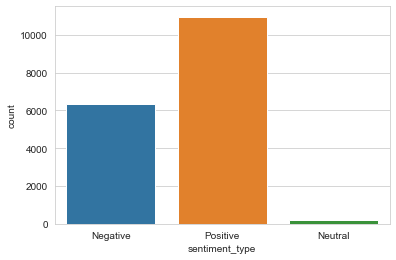

In [43]:
sns.countplot(df["sentiment_type"])

In [ ]:
# Lets check the distribution in %

In [44]:
df.sentiment_type.value_counts(normalize=True)

Positive    0.626215
Negative    0.362010
Neutral     0.011775
Name: sentiment_type, dtype: float64

In [ ]:
# As asked in problem statement we need to predict whether a user recommends or not so in this case we need to classify our 
# sentiment type in 2 types 

In [13]:
def sentiment_classify(df):
    if df['sentiment_type'] == "Positive":
        val = 1
    elif df['sentiment_type'] == "Negative":
        val = 0
    else:
        val = 0
    return val

In [14]:
df['Recommend'] = df.apply(sentiment_classify, axis=1)

In [ ]:
# Lets see the dataset with new values

In [48]:
df.sample(3)

,review_id,title,year,user_review,user_suggestion,developer,publisher,tags,overview,polarity,subjectivity,sentiment_type,Recommend
14002,19946,Infestation: The New Z,2016.0,excellent graphic but the gameplay suck the ch...,0,Fredaikis AB,Fredaikis AB,"['Zombies', 'Free to Play', 'Survival', 'Multi...",Infestation: The New Z is a FREE TO PLAY multi...,0.180000,0.400000,Positive,1
11265,16762,Eternal Card Game,2017.0,early access reviewthe game ai is stacked agai...,0,Dire Wolf Digital,Dire Wolf Digital,"['Free to Play', 'Card Game', 'Strategy', 'Tra...",The Game Has ChangedSix-guns and sorcery colli...,0.030668,0.507840,Positive,1
8183,11193,Neverwinter,2016.0,this is is just awesome there are so many clas...,1,Cryptic Studios,Perfect World Entertainment,"['Free to Play', 'MMORPG', 'RPG', 'Massively M...",,0.244841,0.560582,Positive,1


In [ ]:
# Lets check the distribution

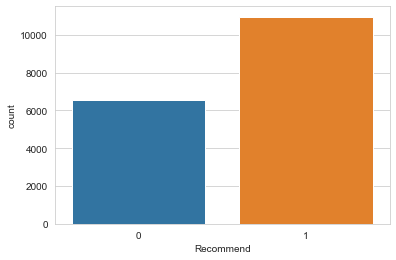

In [50]:
sns.countplot(df["Recommend"])

In [ ]:
# Lets check the accuracy 

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [16]:
confusion_matrix(df["user_suggestion"],df["Recommend"])

array([[4240, 3286],
       [2299, 7669]], dtype=int64)

In [17]:
accuracy_score(df["user_suggestion"],df["Recommend"])

0.6807476849205442

In [68]:
classification_report(df["user_suggestion"],df["Recommend"])

'              precision    recall  f1-score   support\n\n           0       0.65      0.56      0.60      7526\n           1       0.70      0.77      0.73      9968\n\n    accuracy                           0.68     17494\n   macro avg       0.67      0.67      0.67     17494\nweighted avg       0.68      0.68      0.68     17494\n'

In [ ]:
# Lets apply the same processing on test data to predict sentiments

In [18]:
test1=pd.read_csv("C://Users//acer//Desktop//1sem//python//JanatahackNLP//test.csv")

In [ ]:
# some random rows to have a feel of dataset

In [19]:
test1.sample(5)

,review_id,title,year,user_review
1195,5279,Star Trek Online,2017.0,awesome game really big world awesome designs ...
644,4728,World of Warships,2017.0,Great idea to finally make it accessible throu...
1707,6190,Paladins®,2016.0,Early Access ReviewPeople are comparing this t...
1678,6161,Paladins®,2017.0,Early Access Review(+) free overwatch enj...
1267,5351,Star Trek Online,2017.0,Don't be fooled by what steam says - I sunk th...


In [ ]:
# shape of dataset

In [20]:
test1.shape

(8045, 4)

In [ ]:
# Loading second part of dataset

In [21]:
test2=pd.read_csv("C://Users//acer//Desktop//1sem//python//JanatahackNLP//game.csv")

In [ ]:
# Merge both dataset

In [23]:
fd=pd.merge(test1,test2,on="title")

In [ ]:
# detailed summary of dataset

In [24]:
pd.DataFrame({"TotalMissing":fd.isna().sum(),"%Missing":fd.isna().mean(),"DataType":fd.dtypes,"Unique":fd.nunique()})

,TotalMissing,%Missing,DataType,Unique
review_id,0,0.000000,int64,8045
title,0,0.000000,object,20
year,67,0.008328,float64,8
user_review,0,0.000000,object,8045
developer,0,0.000000,object,19
publisher,0,0.000000,object,19
tags,0,0.000000,object,20
overview,0,0.000000,object,20


In [ ]:
# Imputing median in year col

In [26]:
fd.year.fillna(fd.year.median(),inplace=True)

In [ ]:
# converting the review to string

In [28]:
fd["user_review"]=fd.user_review.astype(str)

In [ ]:
# Lets start processing all review given by users

In [29]:
def clean_data(data,column_name):
    documents = []
    document1 = ''

    stemmer = WordNetLemmatizer()

    for sen in range(0, len(data)):  
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(data[sen]))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)
    
        document = re.sub(r'[0-9]+',"", document)

        # Converting to Lowercase
        document = document.lower()

        # Lemmatization
        document = document.split()

        document = [stemmer.lemmatize(word) for word in document]
        document = ' '.join(document)
        documents.append(document)
        df.at[sen,column_name] = document

In [30]:
clean_data(fd["user_review"],"user_review")

In [ ]:
# Lets predict polarity

In [31]:
fd['polarity'] = fd.apply(lambda x: TextBlob(x['user_review']).sentiment.polarity, axis=1)

In [ ]:
# Lets predict subjectivity

In [32]:
fd['subjectivity'] = fd.apply(lambda x: TextBlob(x['user_review']).sentiment.subjectivity, axis=1)

In [ ]:
# classifying polarity

In [34]:
def sentiment(fd):
    if fd['polarity'] > 0:
        val = "Positive"
    elif fd['polarity'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

In [ ]:
# applying this function 

In [35]:
fd['sentiment_type'] = fd.apply(sentiment, axis=1)

In [ ]:
# As asked in problem statement we need to predict whether a user recommends or not so in this case we need to classify our 
# sentiment type in 2 types 

In [36]:
def sentiment_classify(fd):
    if fd['sentiment_type'] == "Positive":
        val = 1
    elif fd['sentiment_type'] == "Negative":
        val = 0
    else:
        val = 0
    return val

In [37]:
fd['Recommend'] = fd.apply(sentiment_classify, axis=1)

In [ ]:
# Lets look at the dataset

In [38]:
fd.sample(5)

,review_id,title,year,user_review,developer,publisher,tags,overview,polarity,subjectivity,sentiment_type,Recommend
1447,5930,Paladins®,2017.0,Early Access ReviewWhat the actual fu*k? Why d...,Evil Mojo Games,Hi-Rez Studios,"['Free to Play', 'Multiplayer', 'FPS', 'Shoote...","Join 25+ million players in Paladins, the free...",-0.100000,0.266667,Negative,0
4130,14174,Fishing Planet,2015.0,Early Access ReviewGame is in the early stages...,Fishing Planet LLC,Fishing Planet LLC,"['Free to Play', 'Fishing', 'Simulation', 'Mul...",Fishing Planet® is a unique and highly realist...,0.122500,0.397500,Positive,1
474,4558,World of Warships,2018.0,If you have an existing account on battlenet d...,Wargaming Group Limited,Wargaming Group Limited,"['Free to Play', 'Naval', 'World War II', 'Mul...",Over 200 historic naval vessels are yours to c...,-0.241667,0.465625,Negative,0
1190,5274,Star Trek Online,2014.0,Really not a bad game. im by no means a avid s...,Cryptic Studios,Perfect World Entertainment,"['Free to Play', 'Sci-fi', 'Massively Multipla...",,0.283333,0.711111,Positive,1
661,4745,World of Warships,2018.0,Same problem as another reviewer. I was restri...,Wargaming Group Limited,Wargaming Group Limited,"['Free to Play', 'Naval', 'World War II', 'Mul...",Over 200 historic naval vessels are yours to c...,-0.030000,0.505000,Negative,0


In [ ]:
# lets prepare a submission file as asked in problem statement

In [40]:
submission=fd[["review_id","Recommend"]]

In [ ]:
# Lets rename the columns as required in problem statement

In [42]:
submission.rename(columns={"Recommend":"user_suggestion"},inplace=True)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [ ]:
# Converting our predictions to csv

In [44]:
submission.to_csv("JantaNLP1.csv",index=False)